In [18]:
# Diabetes Dataset

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv("diabetes_binary_5050split_health_indicators_BRFSS2015.csv")


In [4]:
df

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,1.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,0.0,0.0,6.0,4.0,1.0
70688,1.0,0.0,1.0,1.0,29.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,2.0,0.0,0.0,1.0,1.0,10.0,3.0,6.0
70689,1.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,15.0,0.0,1.0,0.0,13.0,6.0,4.0
70690,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0


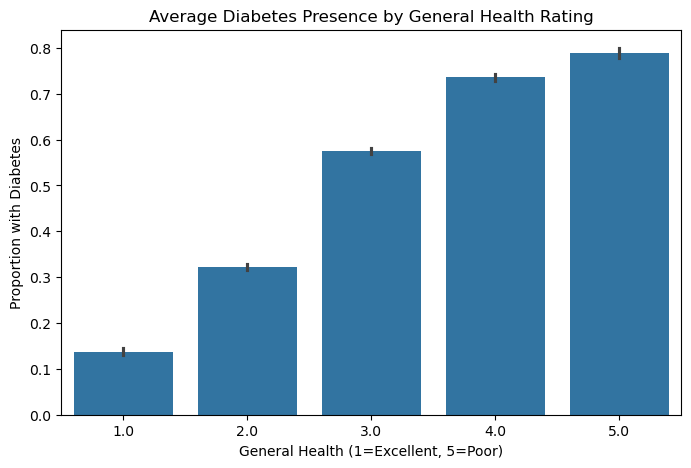

In [6]:
# Health vs. Diabetes Graph
plt.figure(figsize=(8, 5))
sns.barplot(x="GenHlth", y="Diabetes_binary", data=df, estimator=lambda x: sum(x)/len(x))
plt.title("Average Diabetes Presence by General Health Rating")
plt.ylabel("Proportion with Diabetes")
plt.xlabel("General Health (1=Excellent, 5=Poor)")
plt.show()

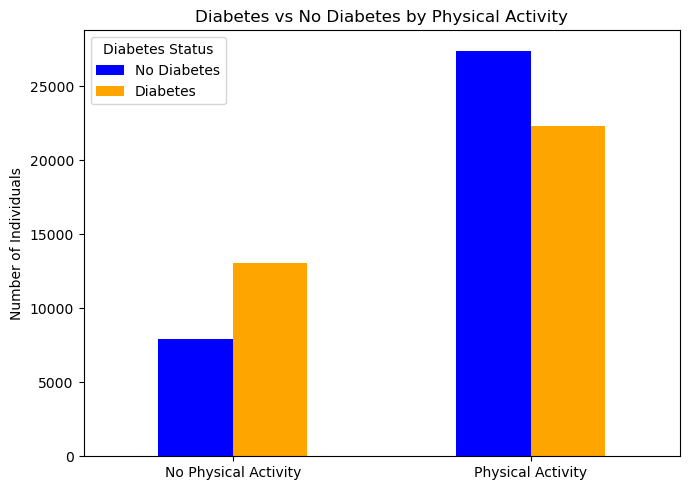

In [52]:
#Physical activity vs. diabetes

df['Physical Activity'] = df['PhysActivity'].map({0.0: 'No Physical Activity', 1.0: 'Physical Activity'})

pa_counts = pd.crosstab(df['Physical Activity'], df['Diabetes_binary'])
pa_counts.columns = ['No Diabetes', 'Diabetes']

ax = pa_counts.plot(kind='bar', stacked=False, color=['blue', 'orange'], figsize=(7, 5))
ax.set_title('Diabetes vs No Diabetes by Physical Activity')
ax.set_ylabel('Number of Individuals')
ax.set_xlabel('')
ax.legend(title='Diabetes Status', loc='upper left')
ax.tick_params(axis='x', rotation=0)
ax.grid(False)

plt.tight_layout()
plt.show()

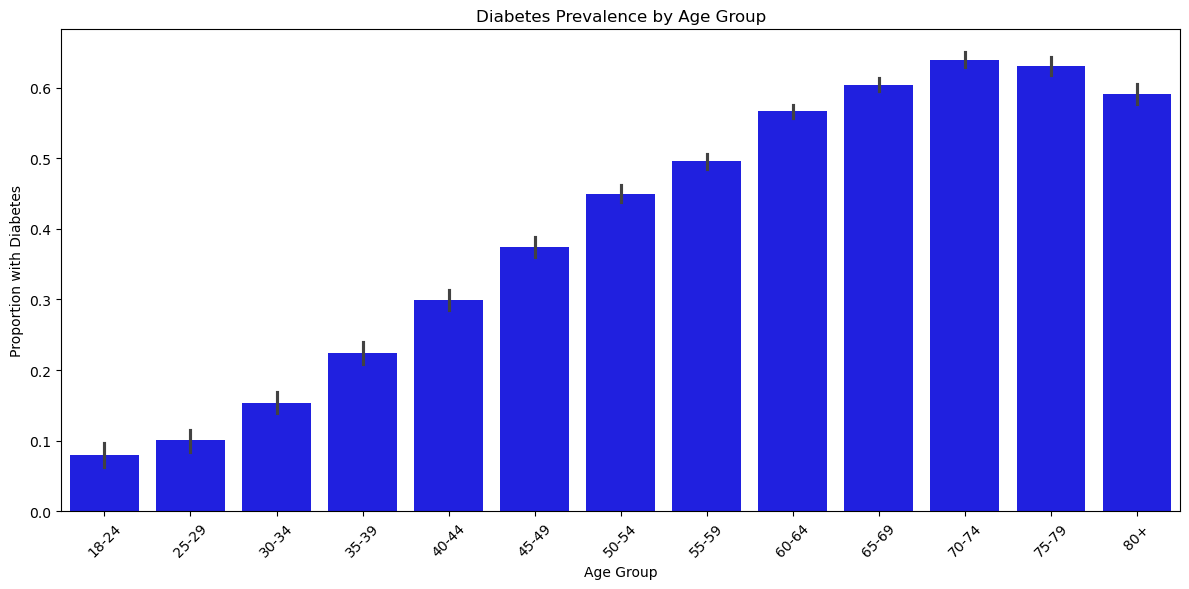

In [77]:
#Age vs. Diabetes graph
age_mapping = {
    1: '18-24', 2: '25-29', 3: '30-34', 4: '35-39', 5: '40-44',
    6: '45-49', 7: '50-54', 8: '55-59', 9: '60-64',
    10: '65-69', 11: '70-74', 12: '75-79', 13: '80+'
}
df['Age Label'] = df['Age'].map(age_mapping)

age_order = ['18-24', '25-29', '30-34', '35-39', '40-44',
             '45-49', '50-54', '55-59', '60-64',
             '65-69', '70-74', '75-79', '80+']
plt.figure(figsize=(12, 6))
sns.barplot(x="Age Label", y="Diabetes_binary", data=df, estimator=np.mean, order=age_order, color = "blue")
plt.title("Diabetes Prevalence by Age Group")
plt.ylabel("Proportion with Diabetes")
plt.xlabel("Age Group")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


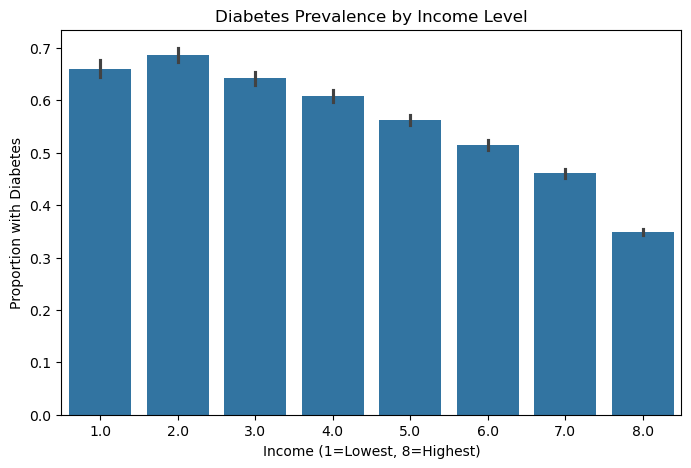

In [16]:
#Income vs. Diabetes

plt.figure(figsize=(8, 5))
sns.barplot(x="Income", y="Diabetes_binary", data=df, estimator=lambda x: sum(x)/len(x))
plt.title("Diabetes Prevalence by Income Level")
plt.ylabel("Proportion with Diabetes")
plt.xlabel("Income (1=Lowest, 8=Highest)")
plt.show()

In [4]:
#Correlation Numbers
correlation_with_diabetes = df.corr()['Diabetes_binary'].sort_values(ascending=False)
display(correlation_with_diabetes)

Diabetes_binary         1.000000
GenHlth                 0.407612
HighBP                  0.381516
BMI                     0.293373
HighChol                0.289213
Age                     0.278738
DiffWalk                0.272646
PhysHlth                0.213081
HeartDiseaseorAttack    0.211523
Stroke                  0.125427
CholCheck               0.115382
MentHlth                0.087029
Smoker                  0.085999
Sex                     0.044413
NoDocbcCost             0.040977
AnyHealthcare           0.023191
Fruits                 -0.054077
Veggies                -0.079293
HvyAlcoholConsump      -0.094853
PhysActivity           -0.158666
Education              -0.170481
Income                 -0.224449
Name: Diabetes_binary, dtype: float64

C:\Users\zache\AppData\Local\Temp\ipykernel_26148\1559898658.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


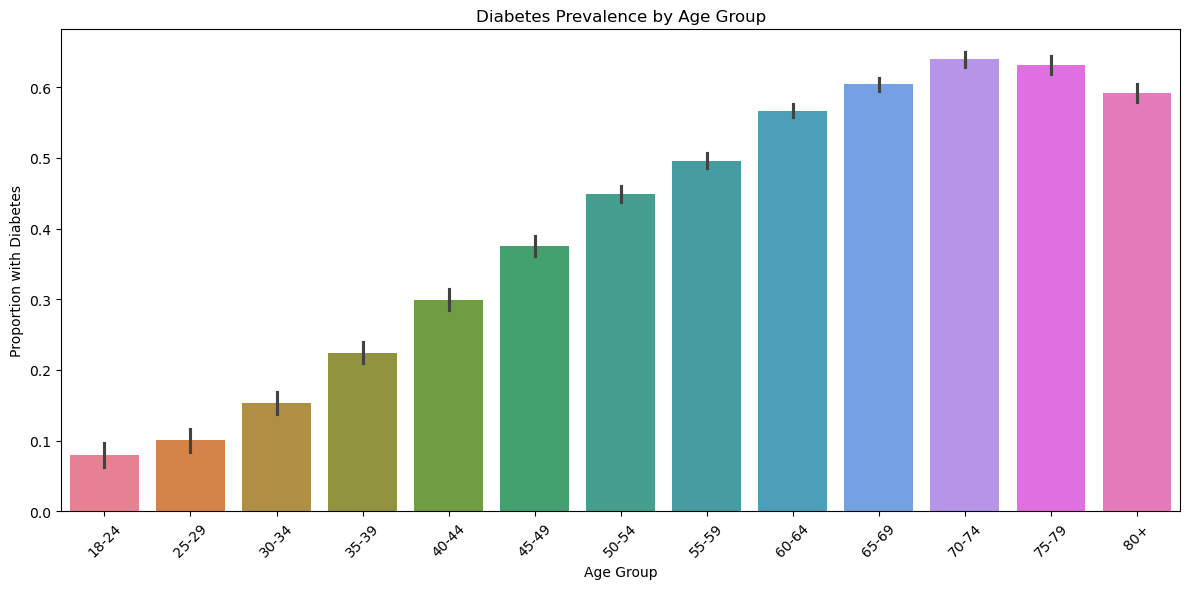

In [26]:
#Age vs. Diabetes
age_mapping = {
    1: '18-24', 2: '25-29', 3: '30-34', 4: '35-39', 5: '40-44',
    6: '45-49', 7: '50-54', 8: '55-59', 9: '60-64',
    10: '65-69', 11: '70-74', 12: '75-79', 13: '80+'
}
df['Age Label'] = df['Age'].map(age_mapping)


age_order = ['18-24', '25-29', '30-34', '35-39', '40-44',
             '45-49', '50-54', '55-59', '60-64',
             '65-69', '70-74', '75-79', '80+']

palette = sns.color_palette("husl", len(age_order))
plt.figure(figsize=(12, 6))
sns.barplot(x="Age Label", y="Diabetes_binary", data=df, estimator=np.mean, order=age_order, palette=palette)
plt.title("Diabetes Prevalence by Age Group")
plt.ylabel("Proportion with Diabetes")
plt.xlabel("Age Group")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



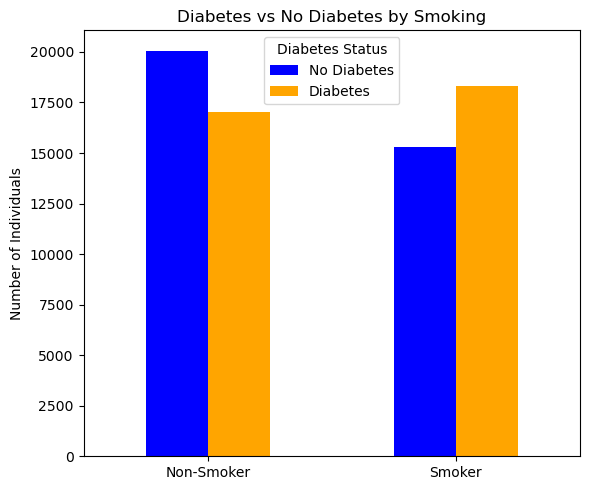

In [61]:
#Smoking graph

df['Smoking'] = df['Smoker'].map({0.0: 'Non-Smoker', 1.0: 'Smoker'})
smoke_counts = pd.crosstab(df['Smoking'], df['Diabetes_binary'])
smoke_counts.columns = ['No Diabetes', 'Diabetes']

smoke_counts.plot(kind='bar', stacked=False, color=['blue', 'orange'], figsize=(6, 5))
plt.title('Diabetes vs No Diabetes by Smoking')
plt.ylabel('Number of Individuals')
plt.xlabel('')
plt.xticks(rotation=0)
plt.legend(title='Diabetes Status')
plt.tight_layout()
plt.show()

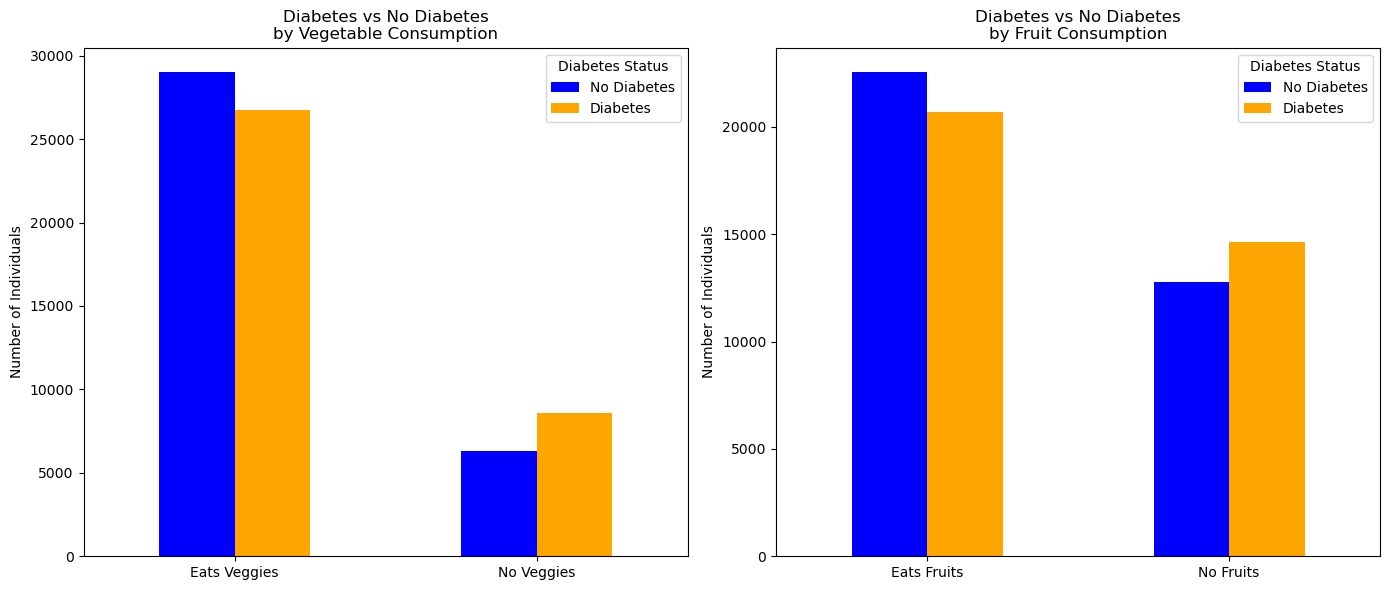

In [83]:

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

df['Vegetable Consumption'] = df['Veggies'].map({0.0: 'No Veggies', 1.0: 'Eats Veggies'})
veg_counts = pd.crosstab(df['Vegetable Consumption'], df['Diabetes_binary'])
veg_counts.columns = ['No Diabetes', 'Diabetes']
veg_counts.plot(kind='bar', stacked=False, color=['blue', 'orange'], ax=axes[0])
axes[0].set_title('Diabetes vs No Diabetes\nby Vegetable Consumption')
axes[0].set_ylabel('Number of Individuals')
axes[0].set_xlabel('')
axes[0].legend(title='Diabetes Status')
plt.xticks(rotation=0)


df['Fruit Consumption'] = df['Fruits'].map({0.0: 'No Fruits', 1.0: 'Eats Fruits'})
fruit_counts = pd.crosstab(df['Fruit Consumption'], df['Diabetes_binary'])
fruit_counts.columns = ['No Diabetes', 'Diabetes']
fruit_counts.plot(kind='bar', stacked=False, color=['blue', 'orange'], ax=axes[1])
axes[1].set_title('Diabetes vs No Diabetes\nby Fruit Consumption')
axes[1].set_ylabel('Number of Individuals')
axes[1].set_xlabel('')
axes[1].legend(title='Diabetes Status')

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='edge', padding=3)
axes[0].tick_params(axis='x', rotation=0)
axes[1].tick_params(axis='x', rotation=0)
plt.tight_layout()
plt.show()

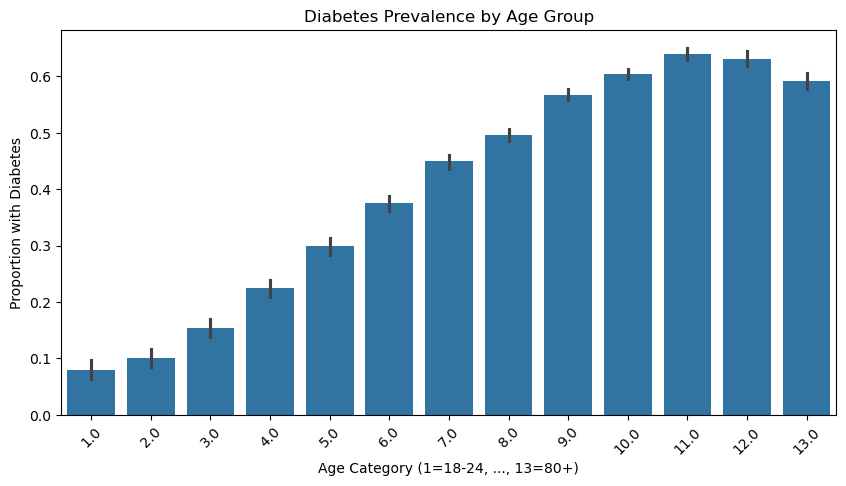

In [22]:
#Age
plt.figure(figsize=(10, 5))
sns.barplot(x="Age", y="Diabetes_binary", data=df, estimator=lambda x: sum(x)/len(x))
plt.title("Diabetes Prevalence by Age Group")
plt.ylabel("Proportion with Diabetes")
plt.xlabel("Age Category (1=18-24, ..., 13=80+)")
plt.xticks(rotation=45)
plt.show()

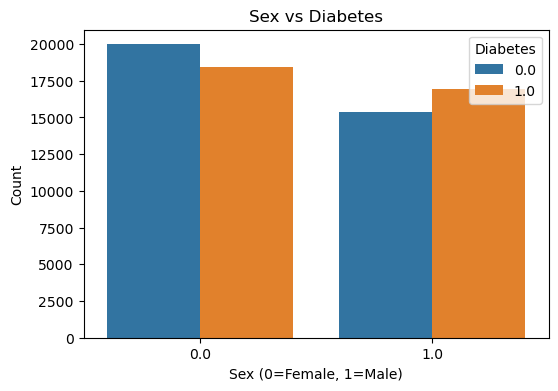

In [23]:
#Sex
plt.figure(figsize=(6, 4))
sns.countplot(x="Sex", hue="Diabetes_binary", data=df)
plt.title("Sex vs Diabetes")
plt.xlabel("Sex (0=Female, 1=Male)")
plt.ylabel("Count")
plt.legend(title="Diabetes")
plt.show()

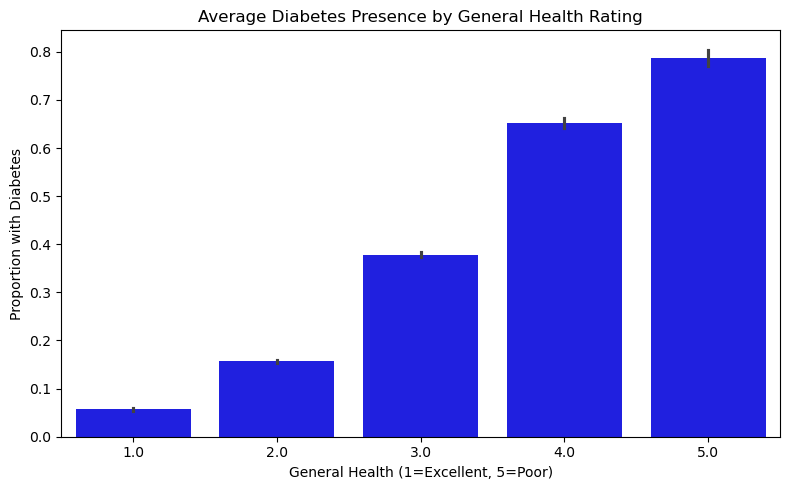

In [87]:
#Health
df1 = pd.read_csv("diabetes_012_health_indicators_BRFSS2015.csv")


plt.figure(figsize=(8, 5))
sns.barplot(x="GenHlth", y="Diabetes_012", data=df1, estimator=lambda x: sum(x)/len(x), color="blue")
plt.title("Average Diabetes Presence by General Health Rating")
plt.ylabel("Proportion with Diabetes")
plt.xlabel("General Health (1=Excellent, 5=Poor)")
plt.tight_layout()
plt.show()

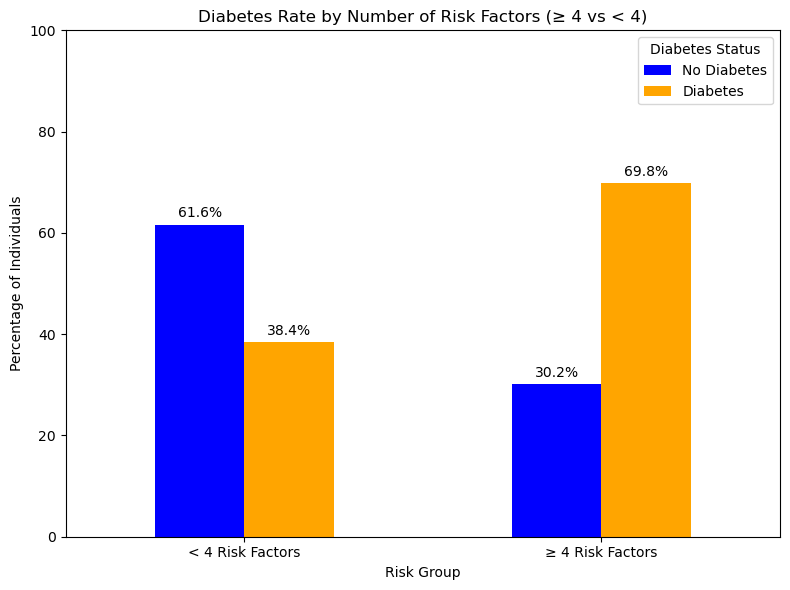

In [81]:
df['Risk_Factor_Count'] = (
    (df['PhysActivity'] == 0).astype(int) +
    (df['Smoker'] == 1).astype(int) +
    (df['Veggies'] == 0).astype(int) +
    (df['Fruits'] == 0).astype(int) +
    (df['HvyAlcoholConsump'] == 1).astype(int) +
    (df['HighBP'] == 1).astype(int) +
    (df['HighChol'] == 1).astype(int) +
    (df['BMI'] >= 30).astype(int)
)
df['4_or_more_Risks'] = df['Risk_Factor_Count'] >= 4

raw_counts = pd.crosstab(df['4_or_more_Risks'], df['Diabetes_binary'])
raw_counts.index = ['< 4 Risk Factors', '≥ 4 Risk Factors']
raw_counts.columns = ['No Diabetes', 'Diabetes']
risk_group_distribution = raw_counts.div(raw_counts.sum(axis=1), axis=0) * 100

ax = risk_group_distribution.plot(kind='bar', stacked=False, color=['blue', 'orange'], figsize=(8, 6))
ax.set_title('Diabetes Rate by Number of Risk Factors (≥ 4 vs < 4)')
ax.set_ylabel('Percentage of Individuals')
ax.set_xlabel('Risk Group')
ax.set_ylim(0, 100)
ax.legend(title='Diabetes Status', loc='upper right')
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='edge', padding=3)
ax.tick_params(axis='x', rotation=0)
ax.grid(False)
plt.tight_layout()
plt.show()